We will load the data and pre-process it as required.

In [1]:
import pandas as pd 
filepath = r"C:\Users\deshpande\Desktop\Statistics project\SkillsNetworkLab\Capstone course\toronto.csv"
df = pd.read_csv(filepath) 
df.shape

(287, 3)

In [2]:
df = df[df.Borough != 'Not assigned']
df.shape

(210, 3)

We will load the Geospatial Co-ordinates data.

In [3]:
filepath =  r'C:\Users\deshpande\Desktop\Statistics project\SkillsNetworkLab\Capstone course\Geospatial_Coordinates.csv'
newdf = pd.read_csv(filepath)

In [4]:
df.sort_values(['Postcode'], inplace = True)
newdf.sort_values(['Postal Code'], inplace = True)

The datasets are cleaned, now, we will attach latitudes and longitudes to our original dataframe

In [5]:
lat = []
lang = []
for i in range(210):
    for j in range(103):
        if df.iloc[i,0] == newdf.iloc[j,0] :
            lat.append(newdf.iloc[j,1])
            lang.append(newdf.iloc[j,2])
            break
df["Latitude"] = lat
df["Longitude"] = lang
df.head(10)

,Postcode,Borough,Neighbourhood,Latitude,Longitude
10,M1B,Scarborough,Rouge,43.806686,-79.194353
11,M1B,Scarborough,Malvern,43.806686,-79.194353
28,M1C,Scarborough,Port Union,43.784535,-79.160497
27,M1C,Scarborough,Rouge Hill,43.784535,-79.160497
26,M1C,Scarborough,Highland Creek,43.784535,-79.160497
41,M1E,Scarborough,Guildwood,43.763573,-79.188711
42,M1E,Scarborough,Morningside,43.763573,-79.188711
43,M1E,Scarborough,West Hill,43.763573,-79.188711
52,M1G,Scarborough,Woburn,43.770992,-79.216917
61,M1H,Scarborough,Cedarbrae,43.773136,-79.239476


We will start K-Means clustering

In [6]:
import numpy as np
from sklearn.preprocessing import StandardScaler
ldf = df[['Latitude','Longitude']]
X = ldf.values[:,:]
X = np.nan_to_num(X)
cluster_dataset = StandardScaler().fit_transform(X)

In [7]:
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 
#plt.figure(figsize=(15, 10))
#plt.scatter(dataframe_filtered.lat, dataframe_filtered.lng, marker='.')

In [8]:
from sklearn.cluster import KMeans 

num_clusters = 11  # Number of unique boroughs

k_means = KMeans(init="k-means++", n_clusters=num_clusters, n_init=12)
k_means.fit(cluster_dataset)
labels = k_means.labels_
df["Labels"] = labels

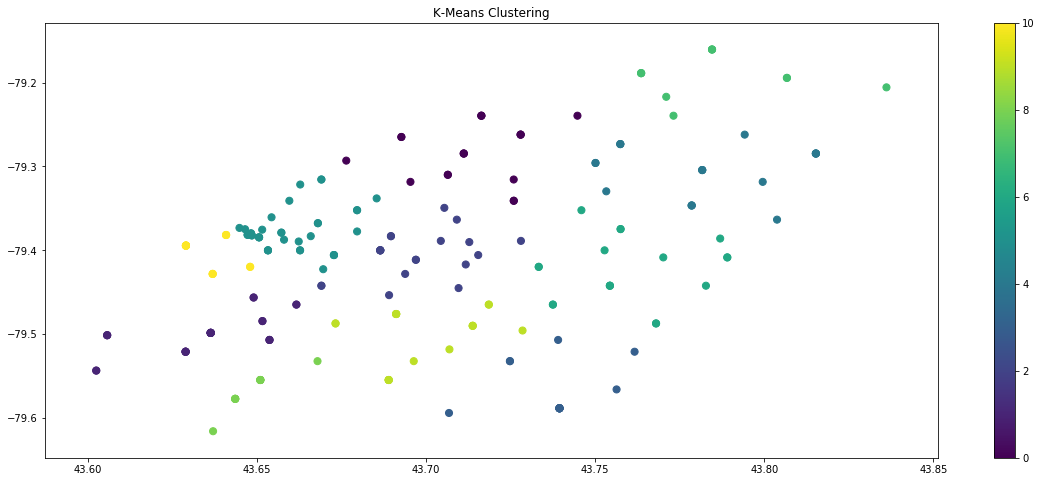

In [9]:
fig = plt.figure(figsize = (20,8))
ax = fig.add_subplot(111)
scatter = ax.scatter(X[:, 0], X[:, 1],c=df['Labels'],s=50)
ax.set_title('K-Means Clustering')
plt.colorbar(scatter)

We will superimpose these points on Toronto region using Folium

In [10]:
import folium
lat = 43.6532
lang = -79.3832

venues_map = folium.Map(location=[lat, lang], zoom_start=10) 
folium.features.CircleMarker(
    [lat, lang],
    radius=1,
    color='red',
    popup='Toronto',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(venues_map)

venues_map

In [12]:
cl1 = df[df.Labels==0]
cl2 = df[df.Labels==1]
cl3 = df[df.Labels==2]
cl4 = df[df.Labels==3]
cl5 = df[df.Labels==4]
cl6 = df[df.Labels==5]
cl7 = df[df.Labels==6]
cl8 = df[df.Labels==7]
cl9 = df[df.Labels==8]
cl10 = df[df.Labels==9]
cl11 = df[df.Labels==10]

for lat, lng in zip(cl1.Latitude, cl1.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='aqua',
        fill = True,
        fill_color ='aqua',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl2.Latitude, cl2.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color=55,
        fill = True,
        fill_color =55,
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl3.Latitude, cl3.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='chocolate',
        fill = True,
        fill_color ='chocolate',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl4.Latitude, cl4.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='crimson',
        fill = True,
        fill_color ='crimson',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl5.Latitude, cl5.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='gray',
        fill = True,
        fill_color ='gray',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl6.Latitude, cl6.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='pink',
        fill = True,
        fill_color ='pink',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl7.Latitude, cl7.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='purple',
        fill = True,
        fill_color ='purple',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl8.Latitude, cl8.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='orange',
        fill = True,
        fill_color ='orange',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl9.Latitude, cl9.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='green',
        fill = True,
        fill_color ='green',
        fill_opacity=0.6
    ).add_to(venues_map)

for lat, lng in zip(cl10.Latitude, cl10.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='magenta',
        fill = True,
        fill_color ='magenta',
        fill_opacity=0.6
    ).add_to(venues_map)
    
for lat, lng in zip(cl11.Latitude, cl11.Longitude):
    folium.features.CircleMarker(
        [lat, lng],
        radius=2,
        color='yellow',
        fill = True,
        fill_color ='yellow',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map